<a href="https://colab.research.google.com/github/arnab031/ML-practice/blob/main/position_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [204]:
DATA_FILENAME1="/content/sample_data/Position_Salaries.csv"
dataframe = pd.read_csv(DATA_FILENAME1)
dataframe.head()

,Position,Level,Salary
0,Software Engineer,1,22000
1,Sr. Software Engineer,2,24000
2,Technology Lead,3,30000
3,Team Leader,4,38000
4,Manager,5,50000


In [205]:
inputs = np.array(dataframe.iloc[:,1:2], dtype='float32')
print(inputs)
targets = np.array(dataframe.iloc[:,2:3], dtype='float32')
print(targets)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[ 22000.]
 [ 24000.]
 [ 30000.]
 [ 38000.]
 [ 50000.]
 [ 75000.]
 [110000.]
 [170000.]
 [260000.]
 [480000.]]


In [206]:
poly_reg = PolynomialFeatures(degree = 5)
#print(poly_reg)
inputs = poly_reg.fit_transform(inputs)
print(inputs)
print(targets)

[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02 1.0240e+03]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03 7.7760e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03 1.6807e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03 5.9049e+04]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04 1.0000e+05]]
[[ 22000.]
 [ 24000.]
 [ 30000.]
 [ 38000.]
 [ 50000.]
 [ 75000.]
 [110000.]
 [170000.]
 [260000.]
 [480000.]]


In [207]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01, 3.2000e+01],
        [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01, 2.4300e+02],
        [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02, 1.0240e+03],
        [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02, 3.1250e+03],
        [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03, 7.7760e+03],
        [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03, 1.6807e+04],
        [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03, 3.2768e+04],
        [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03, 5.9049e+04],
        [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04, 1.0000e+05]])
tensor([[ 22000.],
        [ 24000.],
        [ 30000.],
        [ 38000.],
        [ 50000.],
        [ 75000.],
        [110000.],
        [170000.],
        [260000.],
        

In [208]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[:]

(tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
         [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01, 3.2000e+01],
         [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01, 2.4300e+02],
         [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02, 1.0240e+03],
         [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02, 3.1250e+03],
         [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03, 7.7760e+03],
         [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03, 1.6807e+04],
         [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03, 3.2768e+04],
         [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03, 5.9049e+04],
         [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04, 1.0000e+05]]),
 tensor([[ 22000.],
         [ 24000.],
         [ 30000.],
         [ 38000.],
         [ 50000.],
         [ 75000.],
         [110000.],
         [170000.],
        

In [209]:
# Define data loader
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=False)

In [ ]:
# input_cols = dataframe.columns.values.tolist()
# #input_cols=input_cols[1:]
# print(input_cols)

In [ ]:
# categorical_cols=dataframe.select_dtypes(exclude=["number"]).columns.values.tolist()
# categorical_cols

In [ ]:
# output_cols = [dataframe['Salary'].name]
# output_cols

In [ ]:
# def dataframe_to_arrays(dataframe):
#     # Make a copy of the original dataframe
#     dataframe1 = dataframe.copy(deep=True)
#     # Convert non-numeric categorical columns to numbers
#     for col in categorical_cols:
#         dataframe1[col] = dataframe1[col].astype('category').cat.codes
#     # Extract input & outupts as numpy arrays
#     inputs_array = dataframe1[input_cols].to_numpy()
#     targets_array = dataframe1[output_cols].to_numpy()
#     return inputs_array, targets_array

In [ ]:
# inputs_array, targets_array = dataframe_to_arrays(dataframe)
# inputs_array, targets_array

In [ ]:
# inputs = torch.from_numpy(inputs_array).type(torch.float32)
# targets = torch.from_numpy(targets_array).type(torch.float32)
# inputs, targets

In [ ]:
# dataset = TensorDataset(inputs, targets)
# train_ds=dataset

In [ ]:
# train_loader = DataLoader(train_ds, 1, shuffle=False)

In [210]:
for xb, yb in train_dl:
    print("inputs:", xb)
    print("targets:", yb)
    

inputs: tensor([[1., 1., 1., 1., 1., 1.]])
targets: tensor([[22000.]])
inputs: tensor([[ 1.,  2.,  4.,  8., 16., 32.]])
targets: tensor([[24000.]])
inputs: tensor([[  1.,   3.,   9.,  27.,  81., 243.]])
targets: tensor([[30000.]])
inputs: tensor([[1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02, 1.0240e+03]])
targets: tensor([[38000.]])
inputs: tensor([[1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02, 3.1250e+03]])
targets: tensor([[50000.]])
inputs: tensor([[1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03, 7.7760e+03]])
targets: tensor([[75000.]])
inputs: tensor([[1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03, 1.6807e+04]])
targets: tensor([[110000.]])
inputs: tensor([[1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03, 3.2768e+04]])
targets: tensor([[170000.]])
inputs: tensor([[1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03, 5.9049e+04]])
targets: tensor([[260000.]])
inputs: tensor([[1.0000e+00, 1.0000e+01, 1.0000e+02,

In [ ]:
# input_size = len(inputs)
# output_size = len(targets)
# input_size, output_size

In [215]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(6,1)                  # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                         # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out, targets)                          # fill this
        return loss
    

In [222]:
# Define model
model = Model()
list(model.parameters())

[Parameter containing:
 tensor([[-0.2403, -0.2165,  0.1753, -0.1573,  0.2091,  0.0517]],
        requires_grad=True), Parameter containing:
 tensor([-0.3744], requires_grad=True)]

In [223]:
def fit(epochs, lr, model, train_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        if (epoch+1) % 10 == 0:
            print('Epoch [{}], Loss: {:.4f}'.format(epoch+1, loss.item()))

In [224]:
epochs = 500
lr = 1e-7
fit(epochs, lr, model, train_dl)

Epoch [10], Loss: 451557.0312
Epoch [20], Loss: 429218.1562
Epoch [30], Loss: 406879.2188
Epoch [40], Loss: 384540.2500
Epoch [50], Loss: 362201.2812
Epoch [60], Loss: 339862.3125
Epoch [70], Loss: 317523.3750
Epoch [80], Loss: 295184.4062
Epoch [90], Loss: 272845.5000
Epoch [100], Loss: 250507.0312
Epoch [110], Loss: 228168.5312
Epoch [120], Loss: 205830.0625
Epoch [130], Loss: 183491.5625
Epoch [140], Loss: 161153.0938
Epoch [150], Loss: 138814.5938
Epoch [160], Loss: 116476.1250
Epoch [170], Loss: 94137.6250
Epoch [180], Loss: 71799.0938
Epoch [190], Loss: 49459.9062
Epoch [200], Loss: 34285.9375
Epoch [210], Loss: 23888.7500
Epoch [220], Loss: 13491.6250
Epoch [230], Loss: 3094.4688
Epoch [240], Loss: 778.3125
Epoch [250], Loss: 482.4062
Epoch [260], Loss: 186.5000
Epoch [270], Loss: 109.4375
Epoch [280], Loss: 405.3438
Epoch [290], Loss: 701.2500
Epoch [300], Loss: 997.2188
Epoch [310], Loss: 727.1562
Epoch [320], Loss: 431.2500
Epoch [330], Loss: 135.2812
Epoch [340], Loss: 160.5

In [225]:
epochs = 100
lr = 1e-9
fit(epochs, lr, model, train_dl)

Epoch [10], Loss: 61.2500
Epoch [20], Loss: 2.5312
Epoch [30], Loss: 5.5938
Epoch [40], Loss: 8.6875
Epoch [50], Loss: 8.4688
Epoch [60], Loss: 5.4062
Epoch [70], Loss: 2.3125
Epoch [80], Loss: 0.7812
Epoch [90], Loss: 3.8750
Epoch [100], Loss: 6.9375


In [227]:
epochs = 100
lr = 1e-10
fit(epochs, lr, model, train_dl)

Epoch [10], Loss: 0.8438
Epoch [20], Loss: 0.2188
Epoch [30], Loss: 0.7812
Epoch [40], Loss: 0.3125
Epoch [50], Loss: 0.6875
Epoch [60], Loss: 0.3750
Epoch [70], Loss: 0.4375
Epoch [80], Loss: 0.5625
Epoch [90], Loss: 0.5000
Epoch [100], Loss: 0.4688


In [238]:
#poly_reg = PolynomialFeatures(degree = 6)
#print(poly_reg)
test = poly_reg.fit_transform([[8.3]])
print(test)
test=torch.from_numpy(test).type(torch.float32)
print(test)
model(test)


[[1.00000000e+00 8.30000000e+00 6.88900000e+01 5.71787000e+02
  4.74583210e+03 3.93904064e+04]]
tensor([[1.0000e+00, 8.3000e+00, 6.8890e+01, 5.7179e+02, 4.7458e+03, 3.9390e+04]])


tensor([[189708.2969]], grad_fn=<AddmmBackward>)

For 8.3 degree 6 we got tensor([[159318.7188]]
### For 8.3 degree 5 we got tensor([[189708.2969]]

In [239]:
test=test.detach().numpy()

[[1.0000000e+00 8.3000002e+00 6.8889999e+01 5.7178699e+02 4.7458320e+03
  3.9390406e+04]]


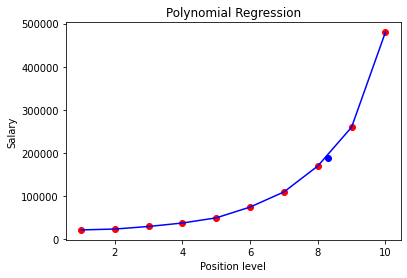

In [247]:
# Visualising the Polynomial Regression results
print(test)
plt.scatter(inputs1, targets, color = 'red')
plt.plot(inputs1, targets, color = 'blue')
plt.plot(8.3,189708.2969,'bo')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# # Utility function to train the model
# def fit(num_epochs, model, loss_fn, opt, train_dl):
    
#     # Repeat for given number of epochs
#     for epoch in range(num_epochs):
        
#         # Train with batches of data
#         for xb,yb in train_dl:
            
#             # 1. Generate predictions
#             pred = model(xb)
            
#             # 2. Calculate loss
#             loss = loss_fn(pred, yb)
            
#             # 3. Compute gradients
#             loss.backward()
            
#             # 4. Update parameters using gradients
#             opt.step()
            
#             # 5. Reset the gradients to zero
#             opt.zero_grad()
        
#         # Print the progress
#         if (epoch+1) % 10 == 0:
#             print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [177]:
# # Generate predictions
# preds = model(inputs)
# preds

tensor([[ 1.0671e+01],
        [ 2.4189e+02],
        [ 1.3635e+03],
        [ 4.0286e+03],
        [ 7.3690e+03],
        [ 6.4559e+03],
        [-1.1275e+04],
        [-7.0631e+04],
        [-2.1431e+05],
        [-5.0958e+05]], grad_fn=<AddmmBackward>)

In [178]:
# # Define loss function
# loss_fn = F.l1_loss

In [179]:
# loss = loss_fn(model(inputs), targets)
# print(loss)

tensor(204532.9844, grad_fn=<L1LossBackward>)


In [181]:
# inputs1 = np.array(dataframe.iloc[:,1:2], dtype='float32')
# print(inputs1)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


In [ ]:
# # Define optimizer
# opt = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
# # Utility function to train the model
# def fit(num_epochs, model, loss_fn, opt, train_dl):
    
#     # Repeat for given number of epochs
#     for epoch in range(num_epochs):
        
#         # Train with batches of data
#         for xb,yb in train_dl:
            
#             # 1. Generate predictions
#             pred = model(xb)
            
#             # 2. Calculate loss
#             loss = loss_fn(pred, yb)
            
#             # 3. Compute gradients
#             loss.backward()
            
#             # 4. Update parameters using gradients
#             opt.step()
            
#             # 5. Reset the gradients to zero
#             opt.zero_grad()
        
#         # Print the progress
#         if (epoch+1) % 10 == 0:
#             print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [ ]:
# fit(500, model, loss_fn, opt, train_dl)

In [ ]:
# # Visualising the Polynomial Regression results
# #preds=preds.detach().numpy()
# plt.scatter(inputs, targets, color = 'red')
# plt.plot(inputs, preds, color = 'blue')
# plt.title('Polynomial Regression')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()